In [4]:
# 数据加载
import pandas as pd
import numpy as np
data = pd.read_csv('task1_data1.csv')
data_results = pd.read_csv('task1_data2.csv')
data.head()
# data_results.head()

,x1,x2,y
0,82.5302,67.9939,0.0
1,14.3821,54.6641,NaN
2,88.9239,14.9664,NaN
3,78.0811,26.0769,NaN
4,78.1597,58.6068,NaN


In [5]:
# 获取唯一一个有标签的数据点，命名为x_labeled
x_labeled = data.iloc[0,:]
print(x_labeled)
print(type(x_labeled))

x1    82.5302
x2    67.9939
y      0.0000
Name: 0, dtype: float64
<class 'pandas.core.series.Series'>


In [6]:
# x赋值
x = data.drop(['y'],axis=1)
x.head()

,x1,x2
0,82.5302,67.9939
1,14.3821,54.6641
2,88.9239,14.9664
3,78.0811,26.0769
4,78.1597,58.6068


In [7]:
# 正确结果的赋值
y = data_results.loc[:,'y']
y.head()


0    0
1    1
2    0
3    0
4    0
Name: y, dtype: int64

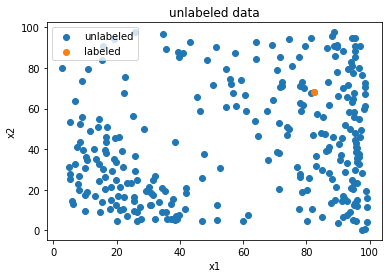

In [8]:
# 数据可视化
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(x.loc[:,'x1'],x.loc[:,'x2'],label='unlabeled')
plt.scatter(x_labeled['x1'],x_labeled['x2'],label='labeled')
plt.title('unlabeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

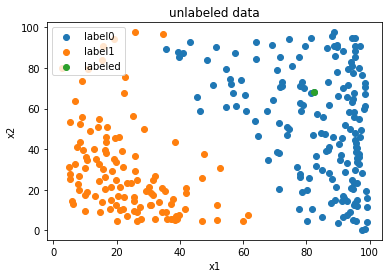

In [9]:
fig2 = plt.figure()
plt.scatter(x.loc[:,'x1'][y==0],x.loc[:,'x2'][y==0],label='label0')
plt.scatter(x.loc[:,'x1'][y==1],x.loc[:,'x2'][y==1],label='label1')
plt.scatter(x_labeled['x1'],x_labeled['x2'],label='labeled')
plt.title('unlabeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

In [10]:
# 建立KMeans模型
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=2,init='random',random_state=0)
# 训练
KM.fit(x)

KMeans(init='random', n_clusters=2, random_state=0)

In [12]:
# 查看聚类中心
centers = KM.cluster_centers_
print(centers)

[[82.88964583 52.50966869]
 [23.23572487 28.61664752]]


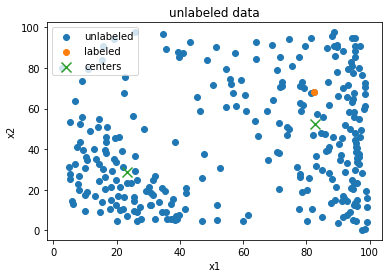

In [16]:
fig3 = plt.figure()
plt.scatter(x.loc[:,'x1'],x.loc[:,'x2'],label='unlabeled')
plt.scatter(x_labeled['x1'],x_labeled['x2'],label='labeled')
plt.scatter(centers[:,0],centers[:,1],100,marker='x',label='centers')
plt.title('unlabeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

In [20]:
# 无监督聚类结果预测
y_predict = KM.predict(x)
print(y_predict)
print(pd.value_counts(y_predict))
print(pd.value_counts(y))

[0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1
 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0    168
1    117
dtype: int64
0    167
1    118
Name: y, dtype: int64


In [21]:
# 准确率计算
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.9964912280701754


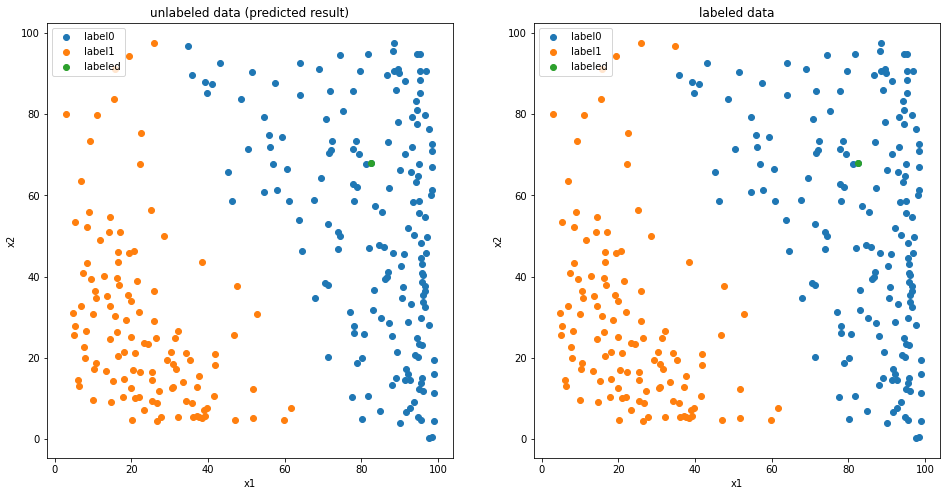

In [36]:
fig4 = plt.figure(figsize=(16,8))
fig5 = plt.subplot(121)
plt.scatter(x.loc[:,'x1'][y_predict==0],x.loc[:,'x2'][y_predict==0],label='label0')
plt.scatter(x.loc[:,'x1'][y_predict==1],x.loc[:,'x2'][y_predict==1],label='label1')
plt.scatter(x_labeled['x1'],x_labeled['x2'],label='labeled')
plt.title('unlabeled data (predicted result)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')

fig6 = plt.subplot(122)
plt.scatter(x.loc[:,'x1'][y==0],x.loc[:,'x2'][y==0],label='label0')
plt.scatter(x.loc[:,'x1'][y==1],x.loc[:,'x2'][y==1],label='label1')
plt.scatter(x_labeled['x1'],x_labeled['x2'],label='labeled')
plt.title('labeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

In [37]:
# 查看第一个带有正确结果标签的样本点的标签
print(x_labeled)
print(y_predict[0])

x1    82.5302
x2    67.9939
y      0.0000
Name: 0, dtype: float64
0


In [38]:
# knn建模部分
#print(x)
#print(y)
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [39]:
# knn预测
y_predict_knn = KNN.predict(x)
accuracy_knn = accuracy_score(y,y_predict_knn)
print(accuracy_knn)

1.0


In [40]:
# 统计类别分布
print(pd.value_counts(y_predict_knn))
print(pd.value_counts(y))

0    167
1    118
dtype: int64
0    167
1    118
Name: y, dtype: int64


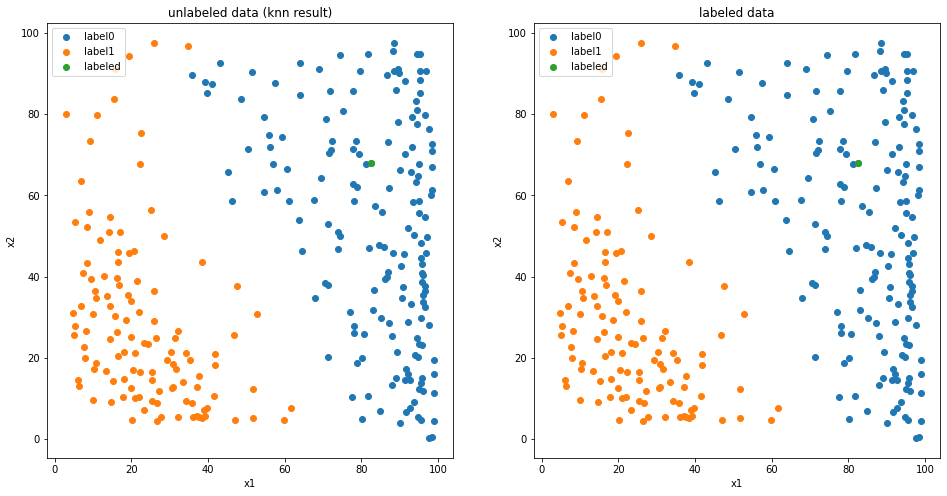

In [42]:
# 可视化
fig7 = plt.figure(figsize=(16,8))
fig8 = plt.subplot(121)
plt.scatter(x.loc[:,'x1'][y_predict_knn==0],x.loc[:,'x2'][y_predict_knn==0],label='label0')
plt.scatter(x.loc[:,'x1'][y_predict_knn==1],x.loc[:,'x2'][y_predict_knn==1],label='label1')
plt.scatter(x_labeled['x1'],x_labeled['x2'],label='labeled')
plt.title('unlabeled data (knn result)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')

fig9 = plt.subplot(122)
plt.scatter(x.loc[:,'x1'][y==0],x.loc[:,'x2'][y==0],label='label0')
plt.scatter(x.loc[:,'x1'][y==1],x.loc[:,'x2'][y==1],label='label1')
plt.scatter(x_labeled['x1'],x_labeled['x2'],label='labeled')
plt.title('labeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

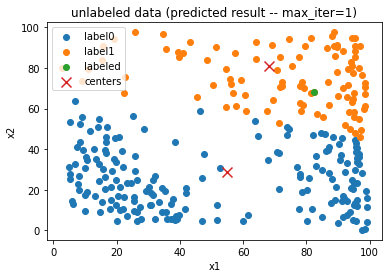

In [45]:
# KMeans 迭代一次结果
KM2 = KMeans(n_clusters=2,init='random',random_state=1,n_init=1,max_iter=1)
KM2.fit(x)
centers2 = KM2.cluster_centers_
y_predict2 = KM2.predict(x)

fig10 = plt.figure()
plt.scatter(x.loc[:,'x1'][y_predict2==0],x.loc[:,'x2'][y_predict2==0],label='label0')
plt.scatter(x.loc[:,'x1'][y_predict2==1],x.loc[:,'x2'][y_predict2==1],label='label1')
plt.scatter(x_labeled['x1'],x_labeled['x2'],label='labeled')
plt.scatter(centers2[:,0],centers2[:,1],100,marker='x',label='centers')
plt.title('unlabeled data (predicted result -- max_iter=1)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')

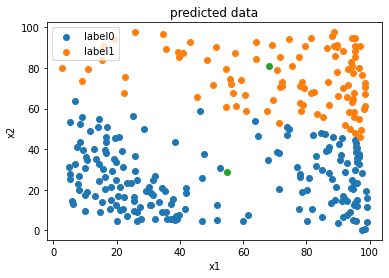

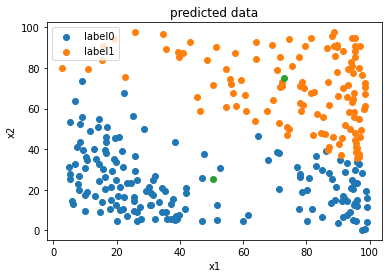

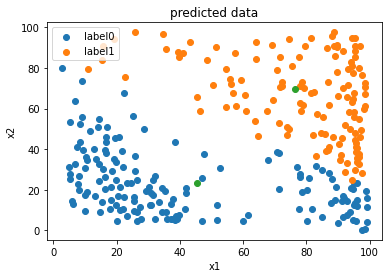

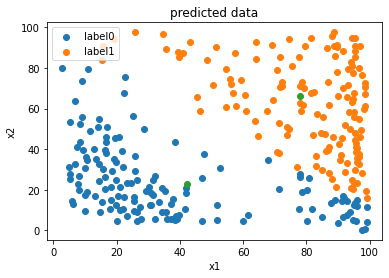

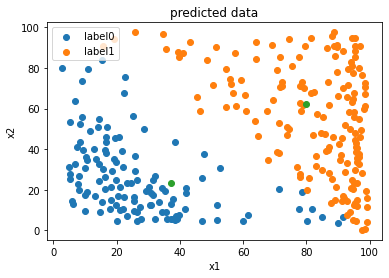

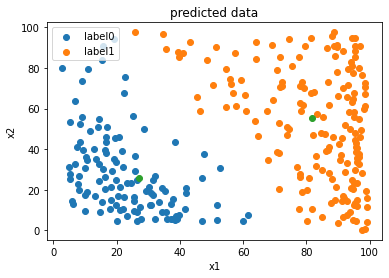

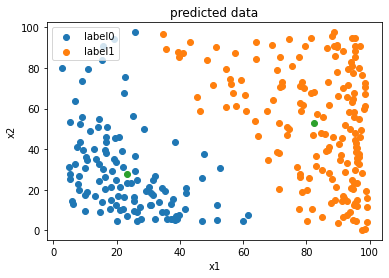

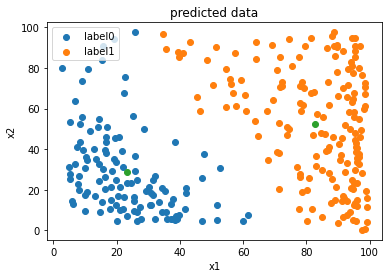

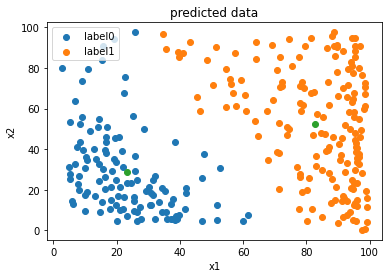

In [48]:
#逐步迭代查看KMeans模型训练效果
centers = np.array([[0,0,0,0]])
for i in range(1,10):
    KM = KMeans(n_clusters=2,random_state=1,init='random',n_init=1,max_iter=i)
    KM.fit(x)

    centers_i = KM.cluster_centers_
    centers_i_temp = centers_i.reshape(1,-1)
    centers = np.concatenate((centers,centers_i_temp),axis=0)
    #predict based on training data
    y_predict = KM.predict(x)

    #visualize the data and results
    fig_i = plt.figure()
    label0 = plt.scatter(x.loc[:,'x1'][y_predict==0],x.loc[:,'x2'][y_predict==0])
    label1 = plt.scatter(x.loc[:,'x1'][y_predict==1],x.loc[:,'x2'][y_predict==1])

    plt.title("predicted data")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend((label0,label1),('label0','label1'), loc='upper left')
    plt.scatter(centers_i[:,0],centers_i[:,1])
    fig_i.savefig('2d_output/{}.png'.format(i),dpi=500,bbox_inches = 'tight')

In [49]:

#生成gif动图
import PIL.Image as Image
def get_gif(pic_dir,n,t=1):
    imgs = []
    for i in range(1,n):
        pic_name = '{}/{}.png'.format(pic_dir,i)
        temp = Image.open(pic_name)
        imgs.append(temp)
    save_name = '{}.gif'.format(pic_dir)
    imgs[0].save(save_name, save_all=True, append_images=imgs, duration=3)
    return save_name


pic_dir = '2d_output'
save_name = get_gif(pic_dir,10,1)
print('制作完成。文件为:{}'.format(save_name))

制作完成。文件为:2d_output.gif
